In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [46]:
url = "dataset.xlsx"
data = pd.read_excel(url)

In [47]:
data.head() #First 5 samples of the our dataset:

Name  NOB   V  SH   CS  CDR    TD       NOC  \
0                     Alarmio-master   22  17   3  169  1.4   1.0  0.364583   
1            AndroidAsyncHTTP-master   11  20  14  494  4.7   6.0  0.474684   
2          android-pdf-viewer-master    2   1   0    4  0.0  12.2  0.000000   
3  android-permission-handler-master    1   1   1    6  0.0   2.1  0.083333   
4            Android-WhatsApp-master    0   6   0  253  3.4   4.2  0.036145   

        CBO        RFC        LOC       CLOC     FanIn    FanOut       LCOM  \
0  2.000000   5.802083  27.260802   3.567901  3.427686  4.367769  21.252630   
1  2.208861  24.006329  25.996479  10.336268  3.172492  2.727170  17.430380   
2  0.500000   1.833333  18.280000   4.560000  1.727273  3.454545   9.666667   
3  1.000000   4.250000  18.757143   3.385714  3.019608  2.333333   8.833333   
4  2.843373   2.120482  46.416898  16.549861  7.336918  5.704301  10.913580   

         WMC       DIT  
0   5.464506  1.968750  
1   5.158451  2.177215  
2   2.560000  1.666667  
3   3.314286  1.666667  
4  11.076696  0.903614

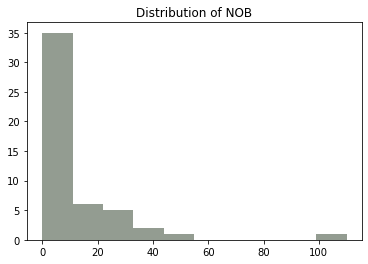

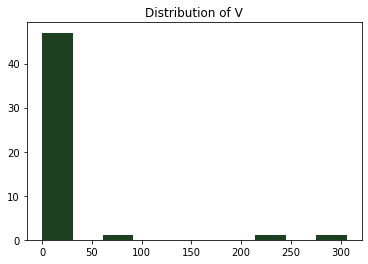

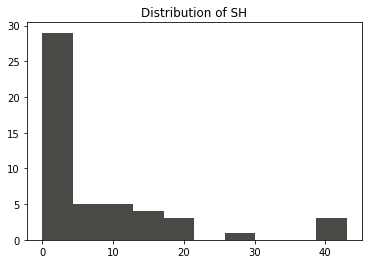

In [48]:
#show the distribution of 3 metrics
def plotHist(columnName,colorName):
    plt.hist(data[columnName], color=colorName)
    plt.title("Distribution of "+columnName)
    plt.show()

    #write your code here
plotHist("NOB","#939c91")
plotHist("V","#1d4021")
plotHist("SH","#484a46")

In [73]:

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data.loc[:,"NOB":].values)
normalized_df = pd.DataFrame(x_scaled)
normalized_df.columns = data.drop(["Name"],axis=1).columns
normalized_df.index = data.Name.values
normalized_df

NOB         V        SH  \
Alarmio-master                                 0.200000  0.055556  0.069767   
AndroidAsyncHTTP-master                        0.100000  0.065359  0.325581   
android-pdf-viewer-master                      0.018182  0.003268  0.000000   
android-permission-handler-master              0.009091  0.003268  0.023256   
Android-WhatsApp-master                        0.000000  0.019608  0.000000   
android-youtubeExtractor-master                0.036364  0.058824  0.162791   
androidtv-sample-inputs-master                 0.136364  0.009804  0.000000   
BirthdayBuddy-master                           0.009091  0.000000  0.000000   
dex2jar                                        0.309091  1.000000  1.000000   
epubator-master                                0.000000  0.039216  0.186047   
example-android-bluetooth-gps-master           0.000000  0.000000  0.000000   
FennecProfileManager                           0.000000  0.000000  0.000000   
flash-chat-android-master                      0.000000  0.000000  0.000000   
InboxPager-master                              0.236364  0.039216  0.976744   
keepassdroid-master                            0.354545  0.774510  0.697674   
KProgressHUD-master                            0.109091  0.000000  0.000000   
libadblockplus-android-master                  0.181818  0.075163  0.069767   
microbit-android-master                        1.000000  0.078431  0.255814   
movistartv-master                              0.063636  0.029412  0.046512   
PixImagePicker-master                          0.063636  0.075163  0.069767   
Scrum-Cards-master                             0.000000  0.003268  0.000000   
Talk-Cup-master                                0.009091  0.003268  0.000000   
termux-app-0.77                                0.290909  0.032680  0.441860   
termux-app-master                              0.290909  0.032680  0.441860   
tflite-android-transformers                    0.018182  0.016340  0.000000   
TouchMapper-master                             0.027273  0.052288  0.069767   
TvFocusBorder-master                           0.000000  0.000000  0.000000   
TvTabLayout-master                             0.054545  0.000000  0.000000   
TvWidget-master                                0.072727  0.000000  0.139535   
wcontacts-lib                                  0.036364  0.009804  0.000000   
WhatsApp-Bulk-Sender                           0.100000  0.065359  0.162791   
WhatsApp-Twitch-Stickers-master                0.027273  0.009804  0.000000   
WhatsApp-Cleaner-master                        0.081818  0.029412  1.000000   
WhatsAppChatAnalyzer-master                    0.018182  0.003268  0.069767   
okhttp-master                                  0.090909  0.022876  0.209302   
retrofit                                       0.181818  0.006536  0.139535   
christmastree-android                          0.000000  0.000000  0.000000   
android_odb_reader                             0.000000  0.000000  0.000000   
Android-Environments                           0.000000  0.013072  0.023256   
pot-pourri-android                             0.000000  0.000000  0.000000   
103-dhbwwe-app-master.csv                      0.009091  0.032680  0.046512   
104-OrderApp-master.csv                        0.000000  0.000000  0.000000   
109-MarkyMark-Android-development.csv          0.000000  0.000000  0.441860   
09-AndroidEntryManagerSonar-master.csv         0.000000  0.000000  0.023256   
10-android-geofeed-master.csv                  0.045455  0.094771  0.372093   
19-apps-android-wikipedia-master.csv           0.490909  0.075163  0.348837   
20-AppTemplateAndroid-master.csv               0.045455  0.075163  0.348837   
22-Big-Brain-Moves-Android-Project-master.csv  0.000000  0.000000  0.255814   
25-Camera-Roll-Android-App-master.csv          0.209091  0.232026  0.232558   
29-dp3t-app-android-ch-master.csv              0.009091  0.000000  0.232558   

                      

# Part1 (Statistical Correlation Analysis)

In [9]:
#Show the correlation matrix of all metrics
data_corr = data.corr(method = "spearman")
data_corr

NOB         V        SH        CS       CDR        TD       NOC  \
NOB     1.000000  0.694733  0.587592  0.691274  0.373251  0.133383  0.407858   
V       0.694733  1.000000  0.629663  0.624194  0.280358  0.296757  0.409002   
SH      0.587592  0.629663  1.000000  0.618509  0.384657 -0.026546  0.512876   
CS      0.691274  0.624194  0.618509  1.000000  0.548113  0.194611  0.402859   
CDR     0.373251  0.280358  0.384657  0.548113  1.000000  0.013400  0.192707   
TD      0.133383  0.296757 -0.026546  0.194611  0.013400  1.000000 -0.179659   
NOC     0.407858  0.409002  0.512876  0.402859  0.192707 -0.179659  1.000000   
CBO     0.353351  0.426221  0.391886  0.577439  0.212007  0.013652  0.667344   
RFC     0.447180  0.345986  0.425499  0.492868  0.240992 -0.126364  0.584086   
LOC     0.349883  0.243636  0.129174  0.440458  0.328527 -0.031098 -0.120165   
CLOC    0.369028  0.208594  0.204069  0.260596  0.171773  0.114297  0.297347   
FanIn   0.458483  0.468565  0.278723  0.456943  0.243709  0.239077  0.268289   
FanOut  0.277107  0.289585  0.156120  0.388502  0.237237  0.240135 -0.074350   
LCOM    0.062748  0.029765 -0.016116  0.065511 -0.038683  0.017159 -0.013518   
WMC     0.507420  0.397770  0.349367  0.569857  0.343628  0.127638  0.173468   
DIT     0.245963  0.110767  0.107688  0.218801  0.123330  0.352010 -0.163788   

             CBO       RFC       LOC      CLOC     FanIn    FanOut      LCOM  \
NOB     0.353351  0.447180  0.349883  0.369028  0.458483  0.277107  0.062748   
V       0.426221  0.345986  0.243636  0.208594  0.468565  0.289585  0.029765   
SH      0.391886  0.425499  0.129174  0.204069  0.278723  0.156120 -0.016116   
CS      0.577439  0.492868  0.440458  0.260596  0.456943  0.388502  0.065511   
CDR     0.212007  0.240992  0.328527  0.171773  0.243709  0.237237 -0.038683   
TD      0.013652 -0.126364 -0.031098  0.114297  0.239077  0.240135  0.017159   
NOC     0.667344  0.584086 -0.120165  0.297347  0.268289 -0.074350 -0.013518   
CBO     1.000000  0.421247  0.177024  0.250408  0.594578  0.240953  0.109694   
RFC     0.421247  1.000000  0.134608  0.381636  0.414878  0.072564  0.444076   
LOC     0.177024  0.134608  1.000000  0.126681  0.554326  0.618676 -0.065455   
CLOC    0.250408  0.381636  0.126681  1.000000  0.416789  0.109636  0.107619   
FanIn   0.594578  0.414878  0.554326  0.416789  1.000000  0.679297  0.296355   
FanOut  0.240953  0.072564  0.618676  0.109636  0.679297  1.000000  0.076982   
LCOM    0.109694  0.444076 -0.065455  0.107619  0.296355  0.076982  1.000000   
WMC     0.492616  0.529367  0.678224  0.355080  0.802910  0.626327  0.291312   
DIT     0.000144  0.237368  0.181072 -0.017867  0.179395  0.295389  0.229251   

             WMC       DIT  
NOB     0.507420  0.245963  
V       0.397770  0.110767  
SH      0.349367  0.107688  
CS      0.569857  0.218801  
CDR     0.343628  0.123330  
TD      0.127638  0.352010  
NOC     0.173468 -0.163788  
CBO     0.492616  0.000144  
RFC     0.529367  0.237368  
LOC     0.678224  0.181072  
CLOC    0.355080 -0.017867  
FanIn   0.802910  0.179395  
FanOut  0.626327  0.295389  
LCOM    0.291312  0.229251  
WMC     1.000000  0.381028  
DIT     0.381028  1.000000

In [10]:
#P values of Spearman Correlation Table
from scipy import stats
data_temp = data.drop(["Name"], axis = 1)
coef, p = stats.spearmanr(data_temp)
p = pd.DataFrame(np.around(p,4))
p.columns = data.columns[1:]
p.index = data.columns[1:]
p






NOB       V      SH      CS     CDR      TD     NOC     CBO  \
NOB     0.0000  0.0000  0.0000  0.0000  0.0076  0.3558  0.0033  0.0118   
V       0.0000  0.0000  0.0000  0.0000  0.0486  0.0364  0.0032  0.0020   
SH      0.0000  0.0000  0.0000  0.0000  0.0058  0.8548  0.0001  0.0049   
CS      0.0000  0.0000  0.0000  0.0000  0.0000  0.1756  0.0037  0.0000   
CDR     0.0076  0.0486  0.0058  0.0000  0.0000  0.9264  0.1800  0.1394   
TD      0.3558  0.0364  0.8548  0.1756  0.9264  0.0000  0.2119  0.9250   
NOC     0.0033  0.0032  0.0001  0.0037  0.1800  0.2119  0.0000  0.0000   
CBO     0.0118  0.0020  0.0049  0.0000  0.1394  0.9250  0.0000  0.0000   
RFC     0.0011  0.0138  0.0021  0.0003  0.0918  0.3819  0.0000  0.0023   
LOC     0.0127  0.0882  0.3713  0.0014  0.0198  0.8302  0.4058  0.2188   
CLOC    0.0084  0.1460  0.1552  0.0676  0.2330  0.4293  0.0360  0.0794   
FanIn   0.0008  0.0006  0.0500  0.0009  0.0881  0.0945  0.0596  0.0000   
FanOut  0.0514  0.0414  0.2790  0.0053  0.0971  0.0930  0.6078  0.0919   
LCOM    0.6651  0.8374  0.9115  0.6513  0.7897  0.9059  0.9258  0.4483   
WMC     0.0002  0.0042  0.0129  0.0000  0.0146  0.3771  0.2283  0.0003   
DIT     0.0851  0.4438  0.4566  0.1269  0.3935  0.0122  0.2557  0.9992   

           RFC     LOC    CLOC   FanIn  FanOut    LCOM     WMC     DIT  
NOB     0.0011  0.0127  0.0084  0.0008  0.0514  0.6651  0.0002  0.0851  
V       0.0138  0.0882  0.1460  0.0006  0.0414  0.8374  0.0042  0.4438  
SH      0.0021  0.3713  0.1552  0.0500  0.2790  0.9115  0.0129  0.4566  
CS      0.0003  0.0014  0.0676  0.0009  0.0053  0.6513  0.0000  0.1269  
CDR     0.0918  0.0198  0.2330  0.0881  0.0971  0.7897  0.0146  0.3935  
TD      0.3819  0.8302  0.4293  0.0945  0.0930  0.9059  0.3771  0.0122  
NOC     0.0000  0.4058  0.0360  0.0596  0.6078  0.9258  0.2283  0.2557  
CBO     0.0023  0.2188  0.0794  0.0000  0.0919  0.4483  0.0003  0.9992  
RFC     0.0000  0.3513  0.0062  0.0027  0.6165  0.0012  0.0001  0.0970  
LOC     0.3513  0.0000  0.3807  0.0000  0.0000  0.6515  0.0000  0.2082  
CLOC    0.0062  0.3807  0.0000  0.0026  0.4485  0.4569  0.0114  0.9020  
FanIn   0.0027  0.0000  0.0026  0.0000  0.0000  0.0366  0.0000  0.2126  
FanOut  0.6165  0.0000  0.4485  0.0000  0.0000  0.5952  0.0000  0.0373  
LCOM    0.0012  0.6515  0.4569  0.0366  0.5952  0.0000  0.0401  0.1093  
WMC     0.0001  0.0000  0.0114  0.0000  0.0000  0.0401  0.0000  0.0063  
DIT     0.0970  0.2082  0.9020  0.2126  0.0373  0.1093  0.0063  0.0000

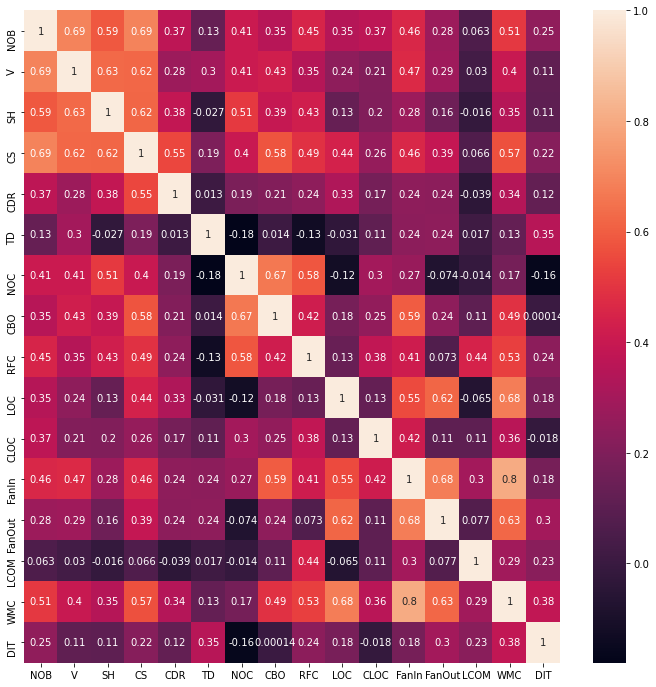

In [11]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, annot = True)
plt.show()

In [12]:
#Correlation between External Metrics & TD
external_td = data_corr.iloc[:6,:6]
external_td

NOB         V        SH        CS       CDR        TD
NOB  1.000000  0.694733  0.587592  0.691274  0.373251  0.133383
V    0.694733  1.000000  0.629663  0.624194  0.280358  0.296757
SH   0.587592  0.629663  1.000000  0.618509  0.384657 -0.026546
CS   0.691274  0.624194  0.618509  1.000000  0.548113  0.194611
CDR  0.373251  0.280358  0.384657  0.548113  1.000000  0.013400
TD   0.133383  0.296757 -0.026546  0.194611  0.013400  1.000000

In [13]:
#Correlation between Internal Metrics & TD
internal_td = data_corr.iloc[4:,4:]
internal_td

CDR        TD       NOC       CBO       RFC       LOC      CLOC  \
CDR     1.000000  0.013400  0.192707  0.212007  0.240992  0.328527  0.171773   
TD      0.013400  1.000000 -0.179659  0.013652 -0.126364 -0.031098  0.114297   
NOC     0.192707 -0.179659  1.000000  0.667344  0.584086 -0.120165  0.297347   
CBO     0.212007  0.013652  0.667344  1.000000  0.421247  0.177024  0.250408   
RFC     0.240992 -0.126364  0.584086  0.421247  1.000000  0.134608  0.381636   
LOC     0.328527 -0.031098 -0.120165  0.177024  0.134608  1.000000  0.126681   
CLOC    0.171773  0.114297  0.297347  0.250408  0.381636  0.126681  1.000000   
FanIn   0.243709  0.239077  0.268289  0.594578  0.414878  0.554326  0.416789   
FanOut  0.237237  0.240135 -0.074350  0.240953  0.072564  0.618676  0.109636   
LCOM   -0.038683  0.017159 -0.013518  0.109694  0.444076 -0.065455  0.107619   
WMC     0.343628  0.127638  0.173468  0.492616  0.529367  0.678224  0.355080   
DIT     0.123330  0.352010 -0.163788  0.000144  0.237368  0.181072 -0.017867   

           FanIn    FanOut      LCOM       WMC       DIT  
CDR     0.243709  0.237237 -0.038683  0.343628  0.123330  
TD      0.239077  0.240135  0.017159  0.127638  0.352010  
NOC     0.268289 -0.074350 -0.013518  0.173468 -0.163788  
CBO     0.594578  0.240953  0.109694  0.492616  0.000144  
RFC     0.414878  0.072564  0.444076  0.529367  0.237368  
LOC     0.554326  0.618676 -0.065455  0.678224  0.181072  
CLOC    0.416789  0.109636  0.107619  0.355080 -0.017867  
FanIn   1.000000  0.679297  0.296355  0.802910  0.179395  
FanOut  0.679297  1.000000  0.076982  0.626327  0.295389  
LCOM    0.296355  0.076982  1.000000  0.291312  0.229251  
WMC     0.802910  0.626327  0.291312  1.000000  0.381028  
DIT     0.179395  0.295389  0.229251  0.381028  1.000000

# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [58]:
url = "dataset.xlsx"
data = pd.read_excel(url)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler


random_state_fixed=53
def linearRegr(X_train,X_test,Y_train,Y_test):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Linear Regressor for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))

def svRegression(X_train,X_test,Y_train,Y_test):
    model = SVR(kernel="rbf")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Linear Regressor with RBF kernel for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))
    #LINEAR
    model = SVR(kernel="linear")
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of S.V.Regressor with linear kernel for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))

def decTreeRegr(X_train,X_test,Y_train,Y_test):
    model = DecisionTreeRegressor(random_state=53)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Decision Tree Regressor for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))

def randomForestRegr(X_train,X_test,Y_train,Y_test):
    model = RandomForestRegressor(random_state=53)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Random Forest Regressor for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))

def mlpRegr(X_train,X_test,Y_train,Y_test):
    model = MLPRegressor(max_iter=2000000,random_state=53)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_test,Y_test,color = "red", label="Original Values")
    plt.scatter(Y_test,Y_pred , color = 'blue', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of M.L.P. Regressor for {}".format(index))
    plt.show()
    print("R-Squared Value:", r2_score(Y_test, Y_pred))
    print("Root-Mean-Squared Error:", mean_squared_error(Y_test,Y_pred,squared=False))

In [80]:
#split data into train and test data
def tts():
    global X
    global Y
    X = normalized_df.iloc[:,7:].values
    Y = normalized_df[index].values
    global X_train
    global Y_train
    global X_test
    global Y_test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/10, random_state=53)

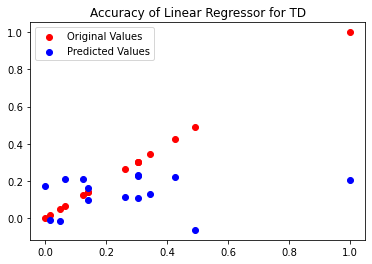

R-Squared Value: -0.29907722389978497
Root-Mean-Squared Error: 0.27894935648468416


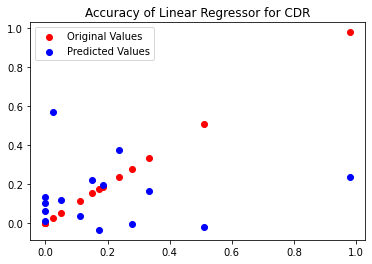

R-Squared Value: -0.41568185005309766
Root-Mean-Squared Error: 0.29998330299090664


In [81]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts()
    linearRegr(X_train,X_test,Y_train,Y_test)

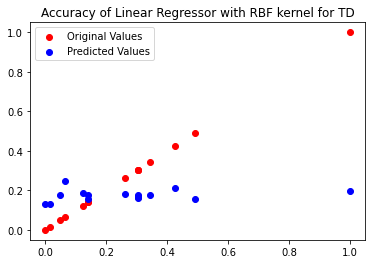

R-Squared Value: -0.08435187470061245
Root-Mean-Squared Error: 0.25485490521089144


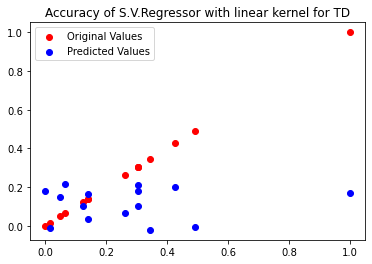

R-Squared Value: -0.4448145501740104
Root-Mean-Squared Error: 0.2941805346215553


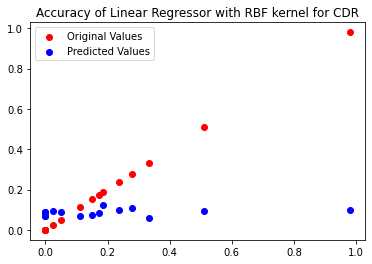

R-Squared Value: -0.17836680254422155
Root-Mean-Squared Error: 0.27368720851888134


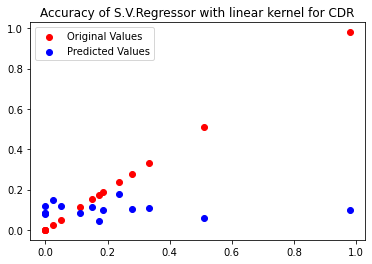

R-Squared Value: -0.20262171584974764
Root-Mean-Squared Error: 0.2764895816641747


In [82]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error)
for index in ["TD","CDR"]:
    tts()
    svRegression(X_train,X_test,Y_train,Y_test)

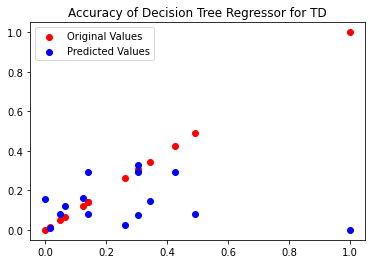

R-Squared Value: -0.5488748417200913
Root-Mean-Squared Error: 0.3045902815766182


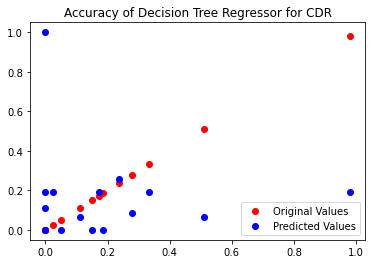

R-Squared Value: -1.113671140724148
Root-Mean-Squared Error: 0.3665497768437371


In [83]:
#Model for Decision Tree Regression
for index in ["TD","CDR"]:
    tts()
    decTreeRegr(X_train,X_test,Y_train,Y_test)

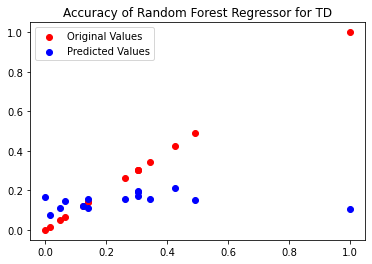

R-Squared Value: -0.20903992392593973
Root-Mean-Squared Error: 0.269108986472723


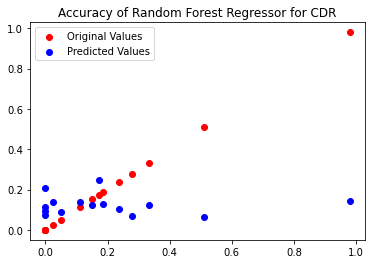

R-Squared Value: -0.15314855077633127
Root-Mean-Squared Error: 0.27074277711899514


In [84]:
#Model for Random Decision Tree Regression
for index in ["TD","CDR"]:
    tts()
    randomForestRegr(X_train,X_test,Y_train,Y_test)
    


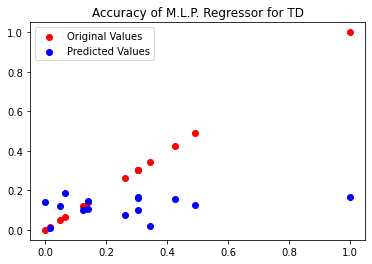

R-Squared Value: -0.2962318780602151
Root-Mean-Squared Error: 0.2786437001065499


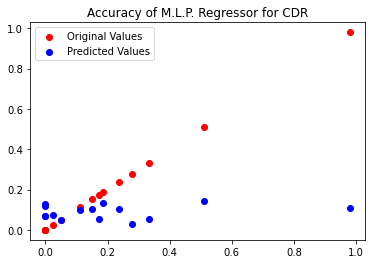

R-Squared Value: -0.16738266326157558
Root-Mean-Squared Error: 0.27240863512964875


In [85]:
#Model for Multi-layer Perceptron Regressor
for index in ["TD","CDR"]:
    tts()
    mlpRegr(X_train,X_test,Y_train,Y_test)

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [86]:
#split data into train and test data
def tts4():
    global X
    global Y
    X = normalized_df.iloc[:,1:5].values
    Y = normalized_df[index].values
    global X_train
    global Y_train
    global X_test
    global Y_test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/10, random_state=53)

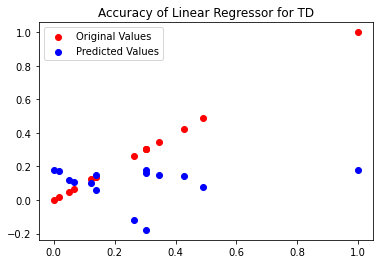

R-Squared Value: -0.6066140266928808
Root-Mean-Squared Error: 0.31021561647999424


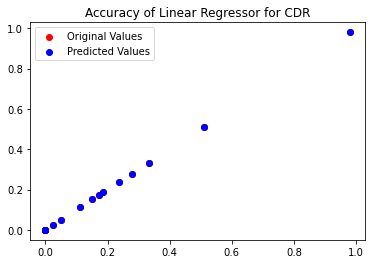

R-Squared Value: 1.0
Root-Mean-Squared Error: 1.3338574953171282e-16


In [87]:
#Model for Linear Regression
for index in ["TD","CDR"]:
    tts4()
    linearRegr(X_train,X_test,Y_train,Y_test)

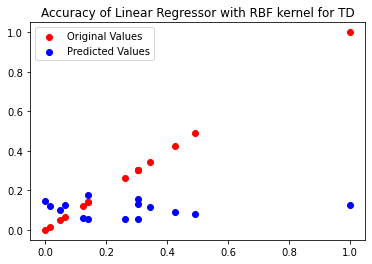

R-Squared Value: -0.44999641994574824
Root-Mean-Squared Error: 0.2947076060142832


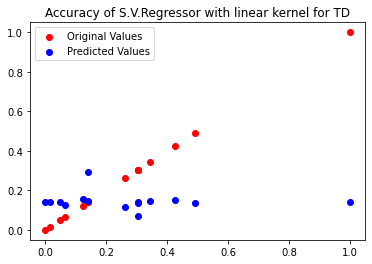

R-Squared Value: -0.311486319519676
Root-Mean-Squared Error: 0.28027848539645783


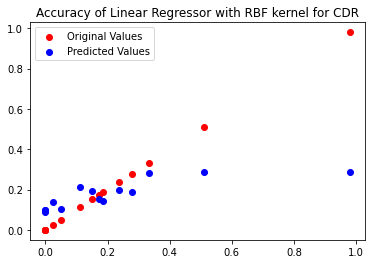

R-Squared Value: 0.35977656641770683
Root-Mean-Squared Error: 0.20173443378008105


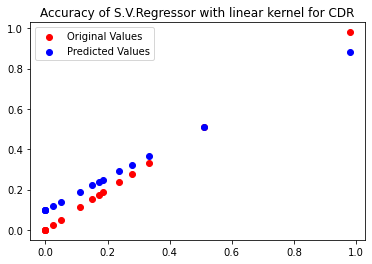

R-Squared Value: 0.9042527955923204
Root-Mean-Squared Error: 0.07801485430865662


In [88]:
#Model for SVR
for index in ["TD","CDR"]:
    tts4()
    svRegression(X_train,X_test,Y_train,Y_test)

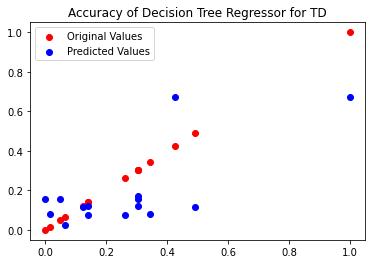

R-Squared Value: 0.4076841779913656
Root-Mean-Squared Error: 0.18835820645489623


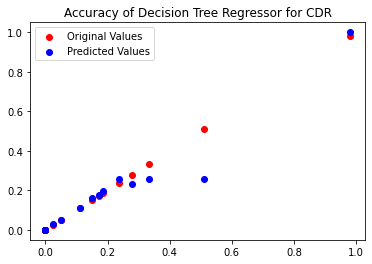

R-Squared Value: 0.9238114261459497
Root-Mean-Squared Error: 0.06959197674216196


In [89]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts4()
    decTreeRegr(X_train,X_test,Y_train,Y_test)

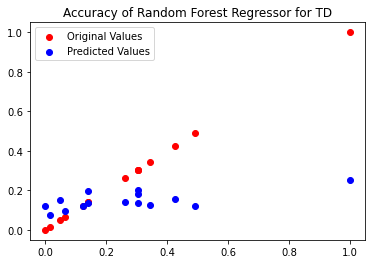

R-Squared Value: -0.01813601852498037
Root-Mean-Squared Error: 0.24695099506217122


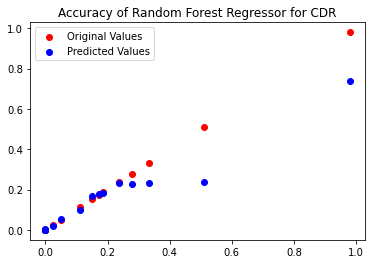

R-Squared Value: 0.8465032949061375
Root-Mean-Squared Error: 0.09877880760235842


In [90]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts4()
    randomForestRegr(X_train,X_test,Y_train,Y_test)

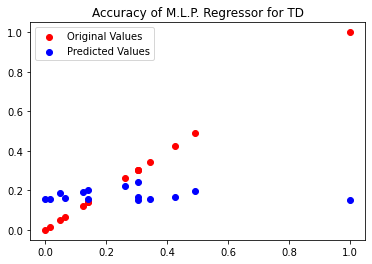

R-Squared Value: -0.1561574064465281
Root-Mean-Squared Error: 0.26315786990973083


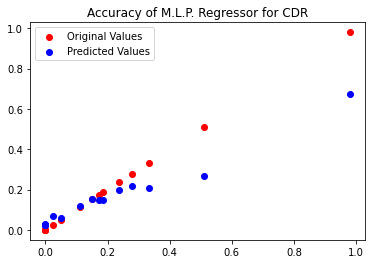

R-Squared Value: 0.8110637006435778
Root-Mean-Squared Error: 0.10959025889756534


In [91]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts4()
    mlpRegr(X_train,X_test,Y_train,Y_test)

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [92]:
#split data into train and test data
def tts5():
    global X
    global Y
    X_temp = normalized_df.drop(["TD","CDR"], axis=1)
    X = X_temp.values
    Y = normalized_df[index].values
    global X_train
    global Y_train
    global X_test
    global Y_test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/10, random_state=53)
    

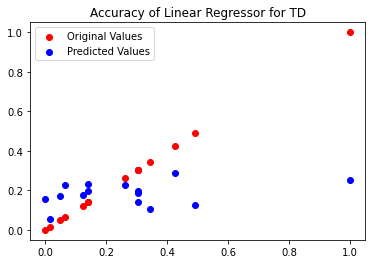

R-Squared Value: -0.003633279100097253
Root-Mean-Squared Error: 0.24518585195724787


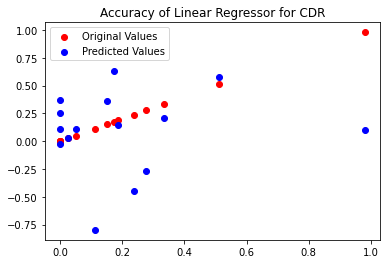

R-Squared Value: -2.0091415912957986
Root-Mean-Squared Error: 0.4373564766984463


In [93]:
#Model for Linear Regression
for index in ["TD","CDR"]:
    tts5()
    linearRegr(X_train,X_test,Y_train,Y_test)

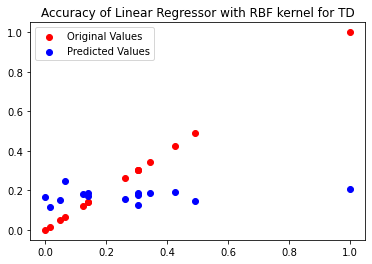

R-Squared Value: -0.09720921648004222
Root-Mean-Squared Error: 0.2563613813817413


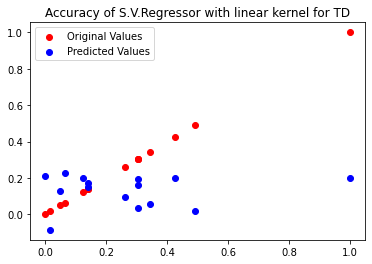

R-Squared Value: -0.36281172246930304
Root-Mean-Squared Error: 0.2857102425477753


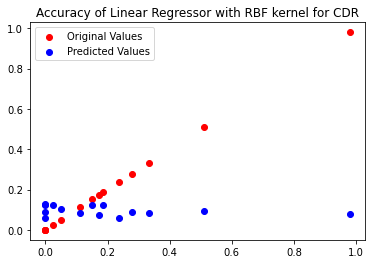

R-Squared Value: -0.23945919966775864
Root-Mean-Squared Error: 0.2806922153718834


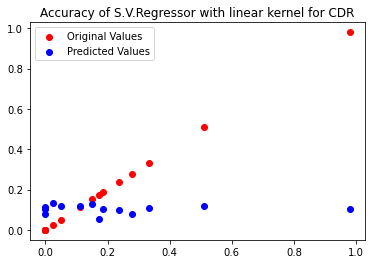

R-Squared Value: -0.1605709781449498
Root-Mean-Squared Error: 0.2716127193456499


In [94]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts5()
    svRegression(X_train,X_test,Y_train,Y_test)

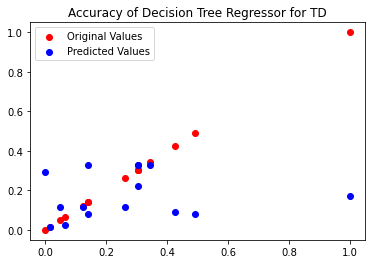

R-Squared Value: -0.2556706581453083
Root-Mean-Squared Error: 0.2742494419820825


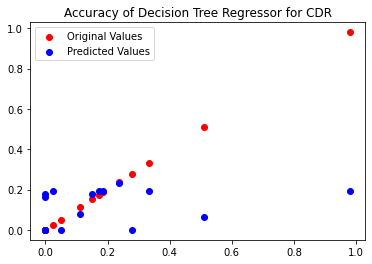

R-Squared Value: -0.05417378556625985
Root-Mean-Squared Error: 0.25886322456148736


In [95]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts5()
    decTreeRegr(X_train,X_test,Y_train,Y_test)

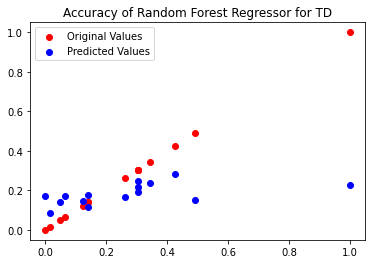

R-Squared Value: 0.07627455457291843
Root-Mean-Squared Error: 0.23522275547294955


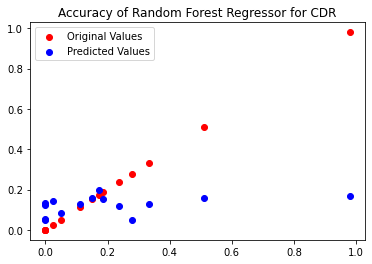

R-Squared Value: 0.01479470371704672
Root-Mean-Squared Error: 0.2502520360002964


In [96]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts5()
    randomForestRegr(X_train,X_test,Y_train,Y_test)

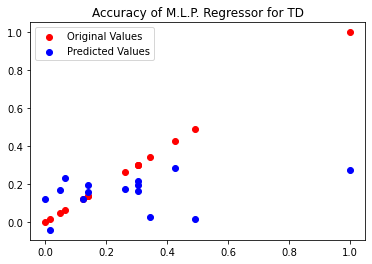

R-Squared Value: -0.09356621979107316
Root-Mean-Squared Error: 0.25593543701691623


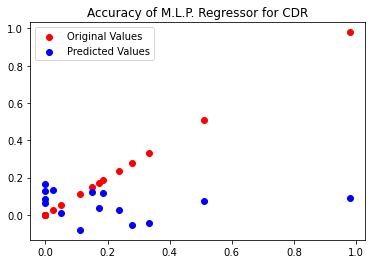

R-Squared Value: -0.47729270505957033
Root-Mean-Squared Error: 0.3064414630972095


In [97]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
for index in ["TD","CDR"]:
    tts5()
    mlpRegr(X_train,X_test,Y_train,Y_test)